<a href="https://colab.research.google.com/github/Sawani830/Machine-Learning-Project/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("dog_breeds.csv")
df

,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),Character Traits,Common Health Problems
0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,10-12,"Loyal, friendly, intelligent, energetic, good-...","Hip dysplasia, obesity, ear infections"
1,German Shepherd,Germany,"Black, Tan",22-26,Brown,7-10,"Loyal, intelligent, protective, confident, tra...","Hip dysplasia, elbow dysplasia, pancreatitis"
2,Bulldog,England,"White, Red",12-16,Brown,8-10,"Loyal, calm, gentle, brave","Skin allergies, respiratory issues, obesity"
3,Poodle,France,"White, Black, Brown, Apricot",10-15,"Brown, Blue",12-15,"Intelligent, active, affectionate, hypoallergenic","Hip dysplasia, epilepsy, bladder stones"
4,Beagle,England,"White, Tan, Red, Lemon",13-15,Brown,12-15,"Curious, friendly, energetic, good-natured","Ear infections, hip dysplasia, epilepsy"
...,...,...,...,...,...,...,...,...
112,Catahoula Leopard Dog,United States,"Merle, Black",20-26,Brown,12-14,"Intelligent, energetic, good-natured, loyal","Dental problems, eye issues, skin allergies"
113,Cocker Spaniel,England,"Black, Brown",14-15,Brown,12-15,"Intelligent, energetic, playful, good-natured","Dental problems, eye issues, skin allergies"
114,Miniature Shiba Inu,Japan,"Red, Sesame",13-16,Brown,12-15,"Intelligent, energetic, playful, good-natured","Dental problems, eye issues, skin allergies"
115,Belgian Tervuren,Belgium,Fawn,22-26,Brown,12-14,"Intelligent, energetic, good-natured, loyal","Dental problems, eye issues, skin allergies"


In [ ]:
# Drop non-numeric columns and preprocess 'Longevity (yrs)' as before
df['Longevity (yrs)'] = df['Longevity (yrs)'].apply(lambda x: np.round(np.mean([int(i) for i in x.split('-')])))
# Drop non-numeric columns
df_numeric = df.drop(columns=['Breed', 'Country of Origin', 'Fur Color', 'Color of Eyes', 'Character Traits', 'Common Health Problems'])

# Convert categorical variables into dummy/indicator variables (one-hot encoding)
df_encoded = pd.get_dummies(df_numeric)

# Split data into features and target
X = df_encoded.drop(columns=['Longevity (yrs)'])
y = df_encoded['Longevity (yrs)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.2916666666666667

Classification Report:
               precision    recall  f1-score   support

         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         1
        11.0       0.25      1.00      0.40         1
        13.0       0.50      0.11      0.18         9
        14.0       0.62      0.38      0.48        13

    accuracy                           0.29        24
   macro avg       0.28      0.30      0.21        24
weighted avg       0.54      0.29      0.34        24



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
def preprocess_longevity(value):
    if isinstance(value, float):  # If it's a float, return it directly
        return value
    else:
        # If it's a range, calculate the average
        parts = [int(part) for part in value.split('-')]
        return np.mean(parts)

df['Longevity (yrs)'] = df['Longevity (yrs)'].apply(preprocess_longevity)

# Display the updated DataFrame
print(df['Longevity (yrs)'])

0      11.0
1       8.0
2       9.0
3      14.0
4      14.0
       ... 
112    13.0
113    14.0
114    14.0
115    13.0
116    13.0
Name: Longevity (yrs), Length: 117, dtype: float64


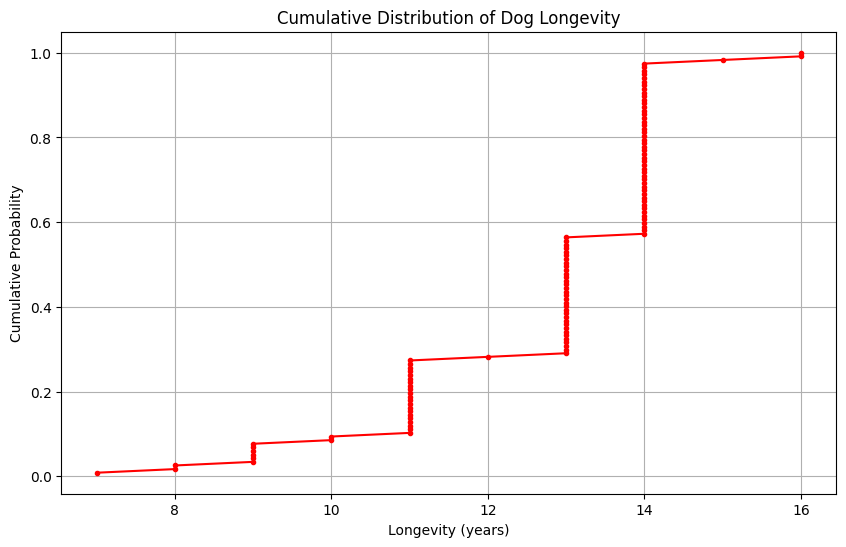

In [ ]:
# Sort the longevity values
sorted_longevity = np.sort(df['Longevity (yrs)'])

# Generate y-axis values for the CDF
y_values = np.arange(1, len(sorted_longevity) + 1) / len(sorted_longevity)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_longevity, y_values, marker='.', linestyle='-', color='red')
plt.title('Cumulative Distribution of Dog Longevity')
plt.xlabel('Longevity (years)')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()


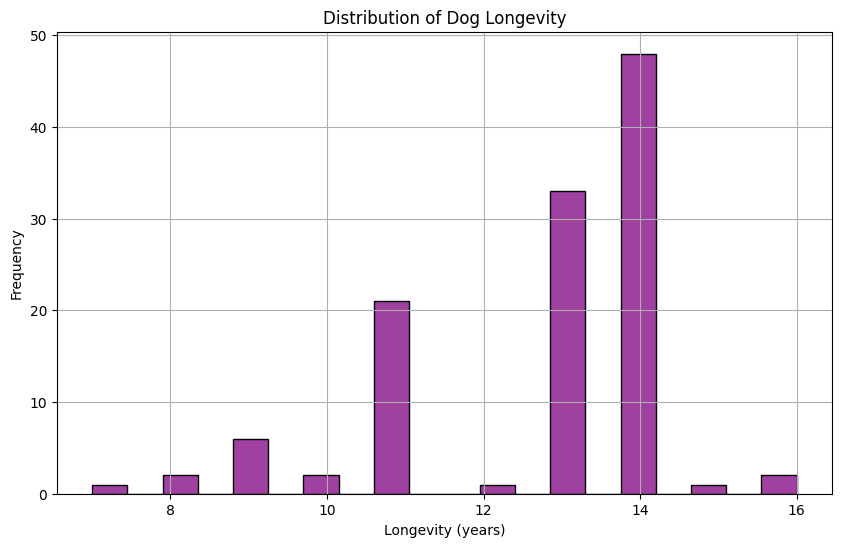

In [ ]:
# Visualization 1: Distribution of Longevity
plt.figure(figsize=(10, 6))
sns.histplot(df['Longevity (yrs)'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Dog Longevity')
plt.xlabel('Longevity (years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

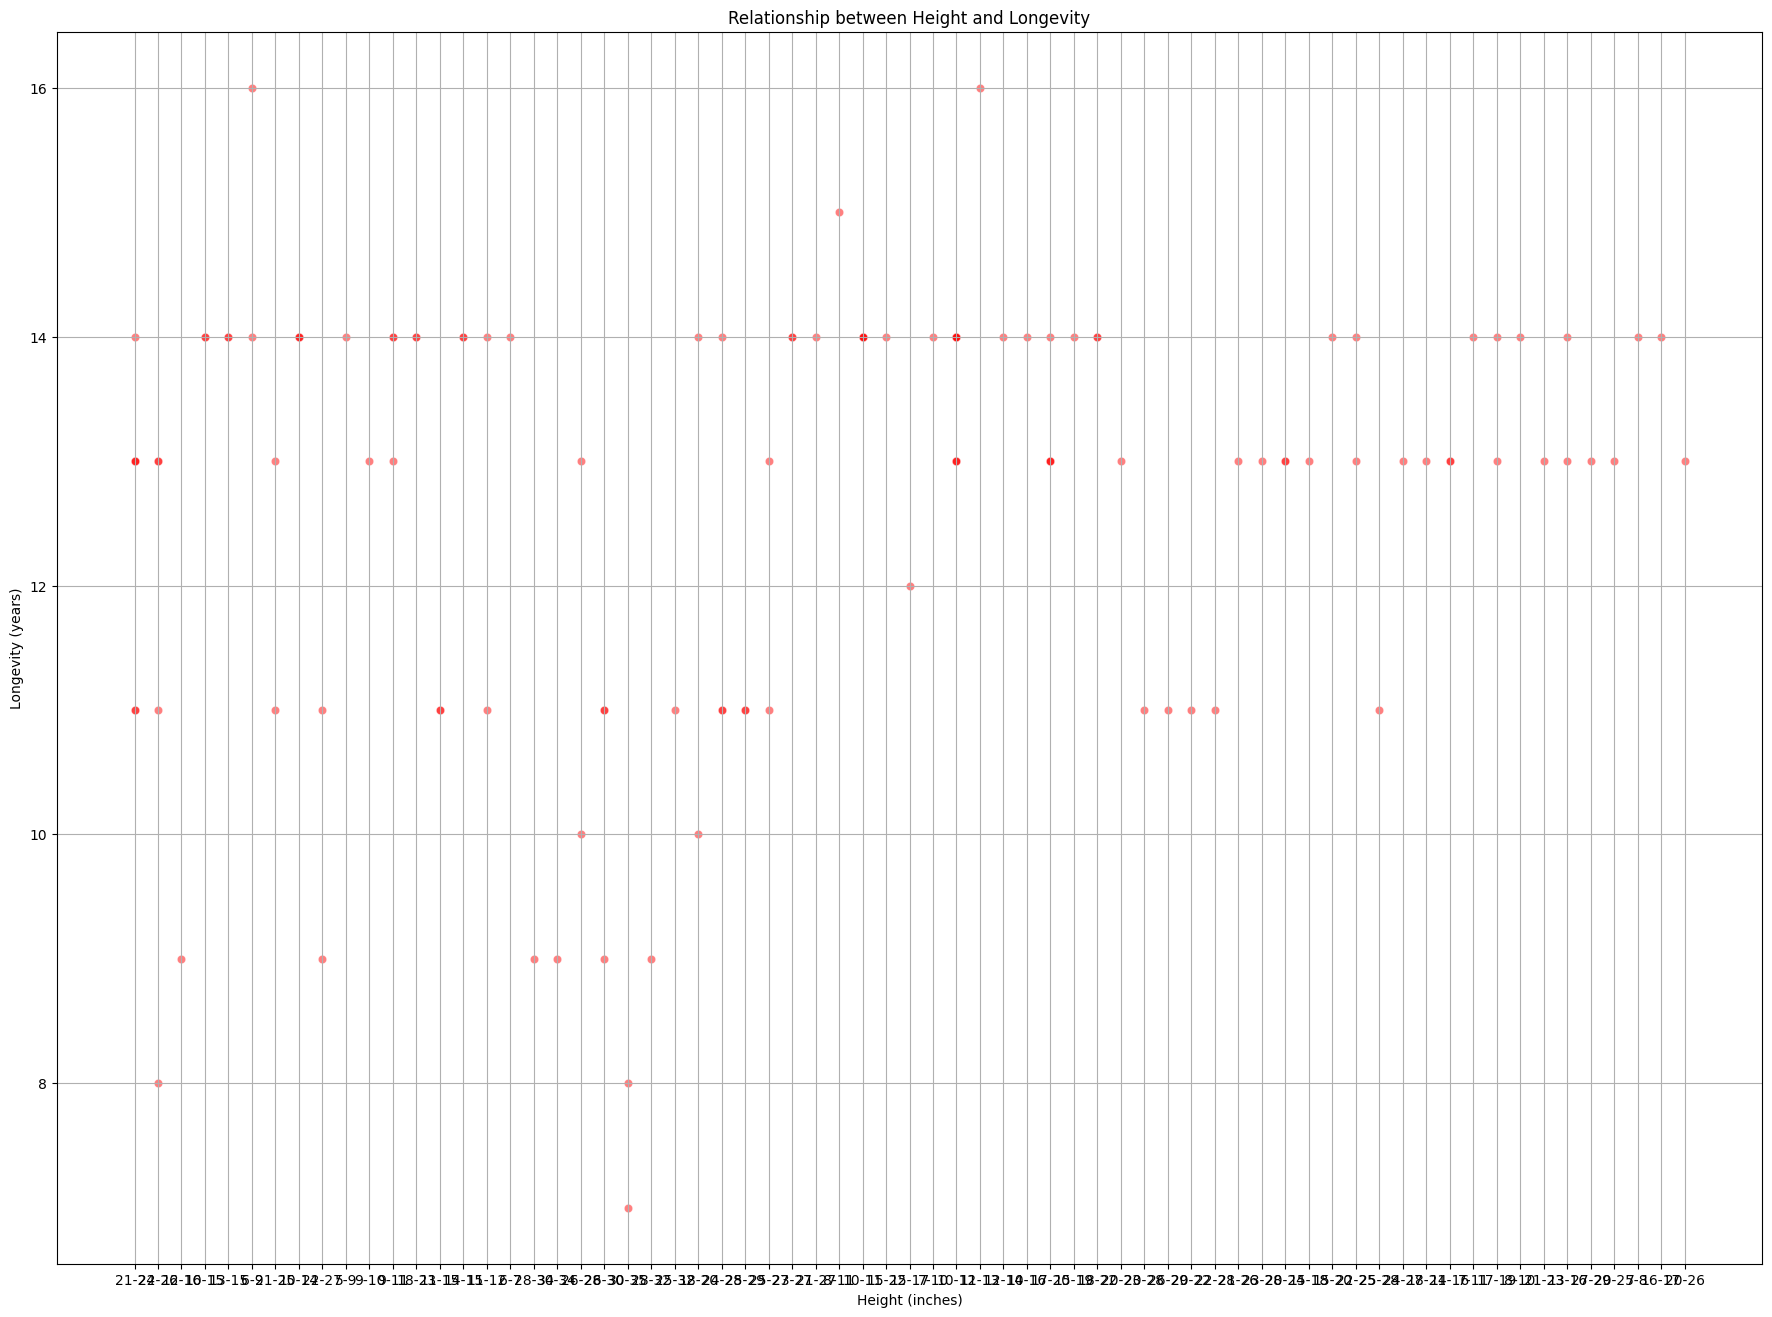

In [ ]:
# Visualization 2: Relationship between Height and Longevity
plt.figure(figsize=(22, 16))
sns.scatterplot(x='Height (in)', y='Longevity (yrs)', data=df, alpha=0.5, color='red')
plt.title('Relationship between Height and Longevity')
plt.xlabel('Height (inches)')
plt.ylabel('Longevity (years)')
plt.grid(True)
plt.show()